Unsupervised learning - Clustering

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
X = pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
y = df['label']
n_y = len(y.unique()) #number of different labels
y = df['label'].to_numpy()


Number of cluster selection: we evaluate the proper number of clusters on the silhouette score in a validation computing the silhouette score for differents number cluster of parameters for each clustering algorithm chosen

Gaussian Mixture

Best number of clusters: 14 with corresponding silhouette score: 0.5253720439766546


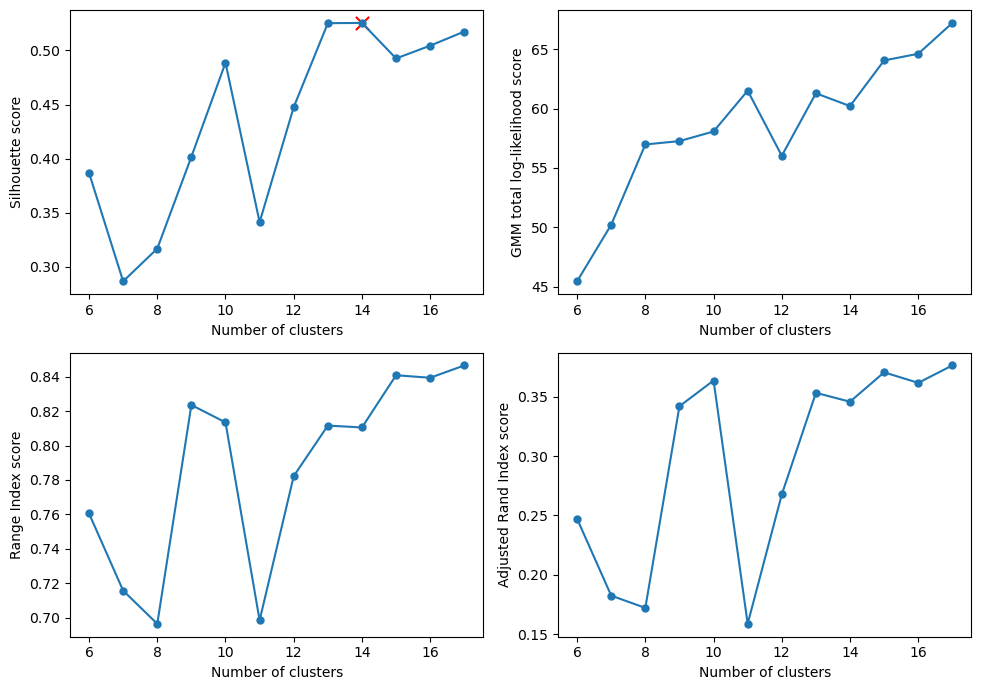

In [22]:
# n_cluster = []
# sh_scores = []
# ri_scores = []
# ari_scores = []
# log_l_list = []

for n in range (int(n_y / 2), int(1.5 * n_y)):
    gmm = GaussianMixture(n_components=n)
    labels = gmm.fit_predict(X)
    n_cluster.append(n)
    sh_scores.append(silhouette_score(X, labels))
    ri_scores.append(rand_score(np.ravel(y), labels))
    ari_scores.append(adjusted_rand_score(np.ravel(y), labels))
    log_l_list.append(gmm.score(X))

best_sh = np.max(sh_scores)
best_n = n_cluster[np.argmax(sh_scores)]
print(f'Best number of clusters: {best_n} with corresponding silhouette score: {best_sh}')

fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].plot(n_cluster, sh_scores, marker='o', markersize=5)
ax[0, 0].scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
ax[0, 0].set_xlabel('Number of clusters')
ax[0, 0].set_ylabel('Silhouette score') 

ax[0, 1].plot(n_cluster, log_l_list, marker='o', markersize=5)
plt.grid()
ax[0, 1].set_xlabel('Number of clusters')
ax[0, 1].set_ylabel('GMM total log-likelihood score')

ax[1, 0].plot(n_cluster, ri_scores, marker='o', markersize=5)
plt.grid()
ax[1, 0].set_xlabel('Number of clusters')
ax[1, 0].set_ylabel('Range Index score')

ax[1, 1].plot(n_cluster, ari_scores, marker='o', markersize=5)
plt.grid()
ax[1, 1].set_xlabel('Number of clusters')
ax[1, 1].set_ylabel('Adjusted Rand Index score')

plt.tight_layout()
plt.show()


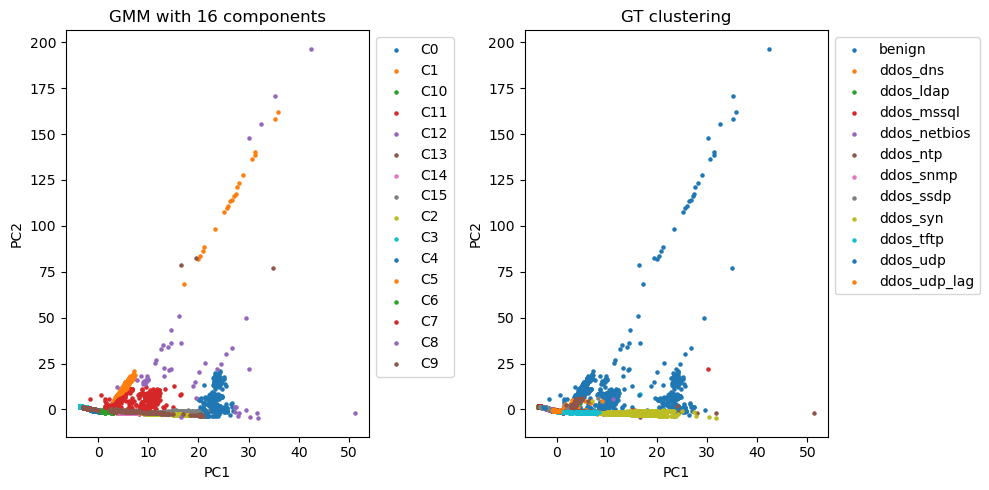

In [32]:
pca_result =pd.read_csv('pca_dataframe.csv').to_numpy()[:,:2]

df = pd.DataFrame(pca_result)

gmm = GaussianMixture(n_components=16)
labels = gmm.fit_predict(df)
df['cid_gmm'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('GMM with 16 components')

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
plt.tight_layout()
plt.show()

In [33]:
cluster_df = df
cluster_df

,0,1,cid_gmm,label
0,-0.640710,-0.460749,C0,ddos_dns
1,-0.613198,-0.166611,C0,ddos_dns
2,-0.707778,-0.460524,C0,ddos_dns
3,-0.645403,-0.407969,C0,ddos_dns
4,-0.675533,-0.432180,C0,ddos_dns
...,...,...,...,...
64234,-0.559916,-0.766404,C0,ddos_udp_lag
64235,0.380449,-0.751165,C0,ddos_udp_lag
64236,-0.528554,-0.783802,C0,ddos_udp_lag
64237,0.381139,-0.733850,C0,ddos_udp_lag


DBSCAN

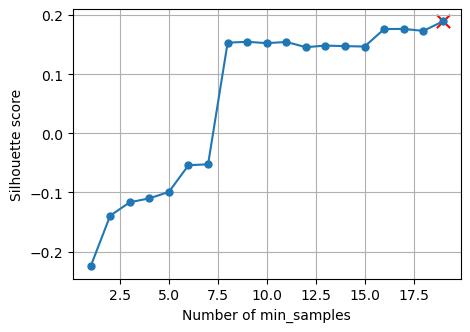

In [7]:
sh_scores = []
n_samples = []

for min in range(1, 20):
    
    dbscan = DBSCAN(min_samples=min)
    labels = dbscan.fit_predict(X)
    sh_scores.append(silhouette_score(X, labels))
    n_samples.append(min)

best_sh = np.max(sh_scores)
best_n = n_samples[np.argmax(sh_scores)]

plt.figure(figsize=(5, 3.5))
plt.plot(n_samples, sh_scores, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of min_samples')
plt.ylabel('Silhouette score') 
plt.show()


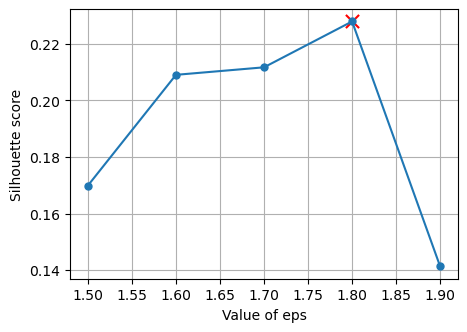

In [7]:
sh_scores =[]
eps_values = []

for eps in np.arange(1.5, 2, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=19)
    labels = dbscan.fit_predict(X)
    sh_scores.append(silhouette_score(X, labels))
    eps_values.append(eps)

best_sh = np.max(sh_scores)
best_eps = eps_values[np.argmax(sh_scores)]

plt.figure(figsize=(5, 3.5))
plt.plot(eps_values, sh_scores, marker='o', markersize=5)
plt.scatter(best_eps, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Value of eps')
plt.ylabel('Silhouette score') 
plt.show()


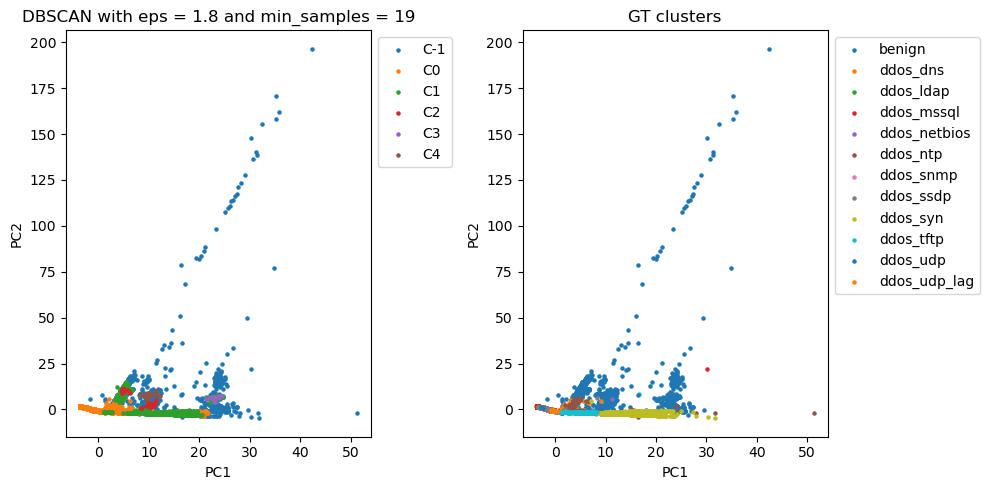

In [36]:
df = X[:,:2].copy()

batch_size = 1000
n_samples, n_features = df.shape
labels = []
dbscan = DBSCAN(eps=1.80, min_samples=19)
for i in range(0, n_samples, batch_size):
    
    X_batch = df[i:i+batch_size, :]
    dbscan.fit(X_batch)
    labels_batch = dbscan.labels_

    if i == 0:
        labels = labels_batch
    else:
        labels = np.concatenate([labels, labels_batch])


df = pd.DataFrame(df)
df['cid_dbscan'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title('DBSCAN with eps = 1.8 and min_samples = 19')

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clusters')

plt.tight_layout()
plt.show()


In [39]:
cluster_df['cid_dbscan'] = df['cid_dbscan']
cluster_df

,0,1,cid_gmm,label,cid_dbscan
0,-0.640710,-0.460749,C0,ddos_dns,C0
1,-0.613198,-0.166611,C0,ddos_dns,C0
2,-0.707778,-0.460524,C0,ddos_dns,C0
3,-0.645403,-0.407969,C0,ddos_dns,C0
4,-0.675533,-0.432180,C0,ddos_dns,C0
...,...,...,...,...,...
64234,-0.559916,-0.766404,C0,ddos_udp_lag,C0
64235,0.380449,-0.751165,C0,ddos_udp_lag,C0
64236,-0.528554,-0.783802,C0,ddos_udp_lag,C0
64237,0.381139,-0.733850,C0,ddos_udp_lag,C0


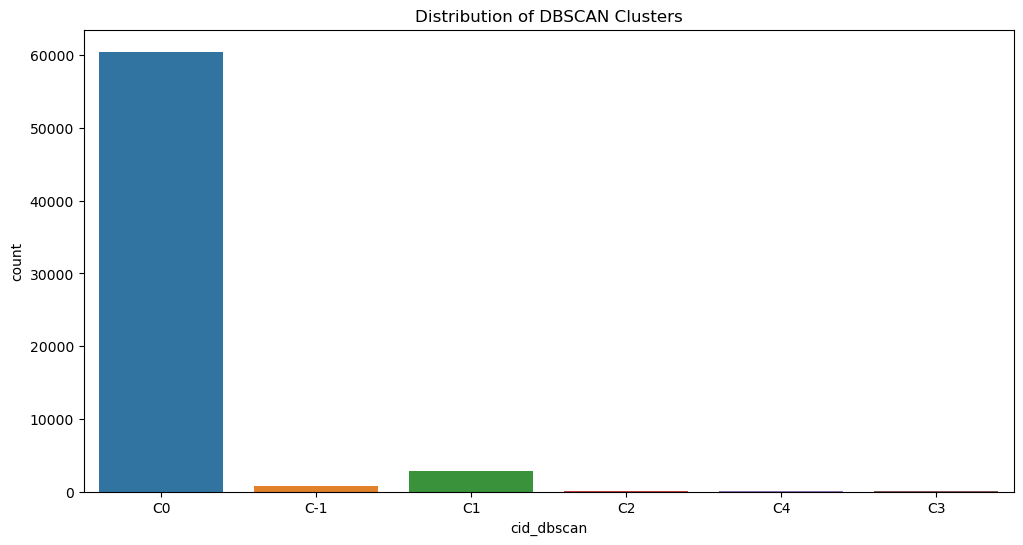

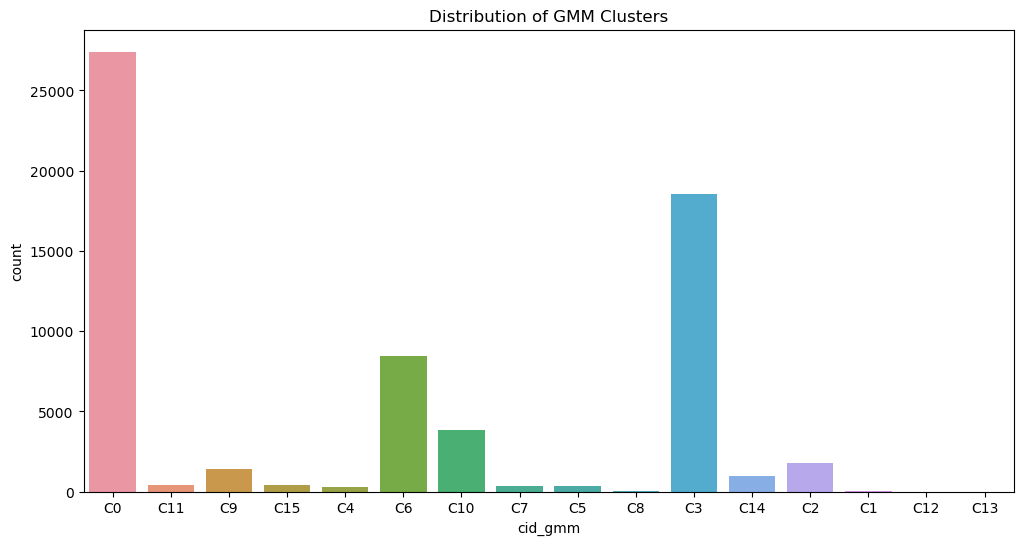

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cid_dbscan', data=cluster_df)
plt.title('Distribution of DBSCAN Clusters')
plt.show()

# Visualize the distribution of GMM clusters
plt.figure(figsize=(12, 6))
sns.countplot(x='cid_gmm', data=cluster_df)
plt.title('Distribution of GMM Clusters')
plt.show()

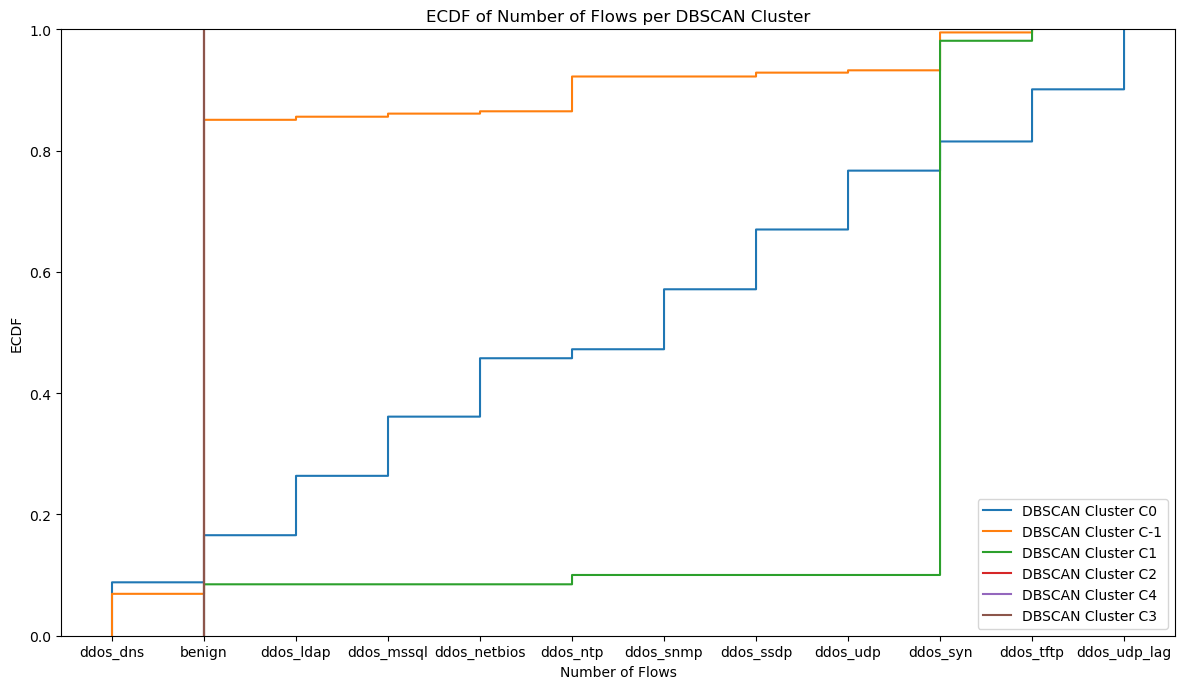

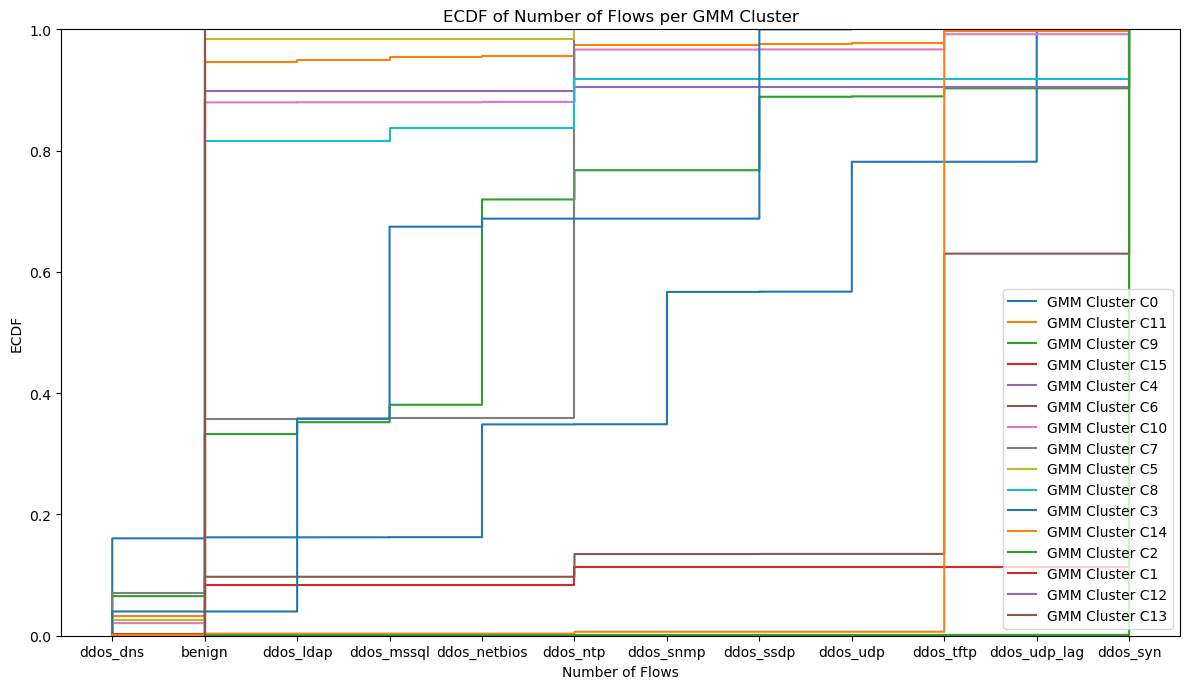

In [50]:

plt.figure(figsize=(12,7))
# DBSCAN
for label in cluster_df['cid_dbscan'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_dbscan'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'DBSCAN Cluster {label}')


plt.title('ECDF of Number of Flows per DBSCAN Cluster')
plt.xlabel('Number of Flows')
plt.ylabel('ECDF')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,7))
# GMM
for label in cluster_df['cid_gmm'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_gmm'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'GMM Cluster {label}')


plt.title('ECDF of Number of Flows per GMM Cluster')
plt.xlabel('Number of Flows')
plt.ylabel('ECDF')
plt.legend()

plt.tight_layout()
plt.show()